In [1]:
from skimage import io, measure, img_as_ubyte
from skimage.filters import threshold_otsu, threshold_multiotsu
from skimage.color import label2rgb, rgb2gray
from skimage.segmentation import clear_border
import numpy as np
import matplotlib.pyplot as plt

(514, 648)


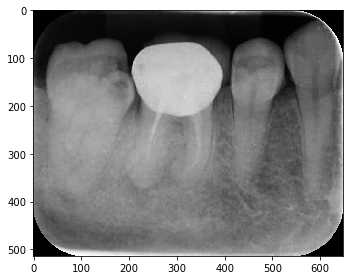

In [2]:
sample_img = io.imread('Data/1-crown/15.jpg', as_gray=True)
print(np.shape(sample_img))
io.imshow(sample_img)

(array([10965.,  2881.,   497.,  1934.,  2063.,  5805.,  2720.,  4406.,
         1849.,  2978.,  2386.,   932.,  1545.,   658.,  1013.,   410.,
          680.,   344.,   699.,   713.,   327.,   611.,   328.,   656.,
          342.,   701.,   375.,   695.,   679.,   354.,   673.,   325.,
          737.,   383.,   775.,   378.,   792.,   819.,   417.,   879.,
          408.,   895.,   479.,   933.,   509.,  1141.,  1349.,   697.,
         1739.,   961.,  2073.,  1123.,  2643.,  1479.,  3041.,  3514.,
         1960.,  4048.,  2257.,  4810.,  2487.,  5308.,  2737.,  5314.,
         5385.,  2684.,  5431.,  2844.,  5654.,  3056.,  6067.,  3158.,
         6224.,  6185.,  3117.,  6372.,  3414.,  6808.,  3610.,  7253.,
         3713.,  7832.,  7759.,  3817.,  7255.,  3487.,  6766.,  3277.,
         6491.,  3015.,  5459.,  5298.,  2482.,  4863.,  2355.,  4915.,
         2379.,  5002.,  2501.,  4600.,  4241.,  2110.,  3883.,  1862.,
         3588.,  1610.,  2749.,  1107.,  1674.,  1028.,   361., 

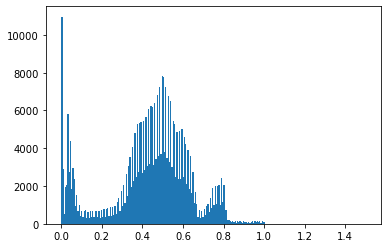

In [3]:
plt.hist(sample_img.flat, bins='auto', range=(0,1.5))

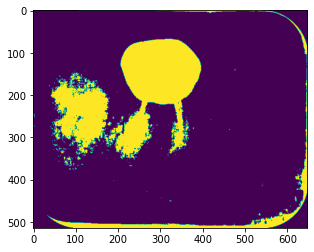

In [4]:
background = (sample_img <= 0.6)
img_data = (sample_img>0.6)
plt.imshow(img_data)

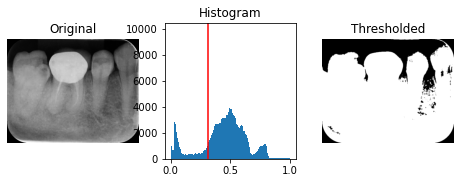

In [5]:
thresh = threshold_otsu(sample_img)
binary = sample_img > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(sample_img, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(sample_img.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

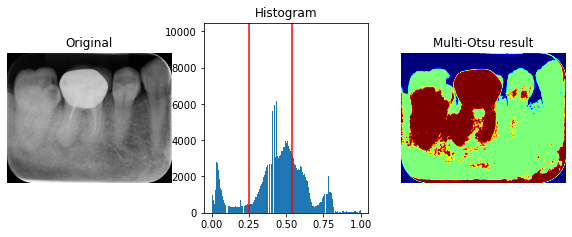

In [6]:
# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(sample_img)

# Using the threshold values, we generate the three regions.
regions = np.digitize(sample_img, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(sample_img, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(sample_img.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

# Image segmentation followed by measurements

(514, 648)


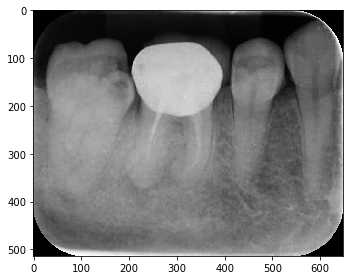

In [7]:
img_as_ubyte(sample_img)
print(np.shape(sample_img))
io.imshow(sample_img)

(array([10965.,  2881.,   497.,  1934.,  2063.,  5805.,  2720.,  4406.,
         1849.,  2978.,  2386.,   932.,  1545.,   658.,  1013.,   410.,
          680.,   344.,   699.,   713.,   327.,   611.,   328.,   656.,
          342.,   701.,   375.,   695.,   679.,   354.,   673.,   325.,
          737.,   383.,   775.,   378.,   792.,   819.,   417.,   879.,
          408.,   895.,   479.,   933.,   509.,  1141.,  1349.,   697.,
         1739.,   961.,  2073.,  1123.,  2643.,  1479.,  3041.,  3514.,
         1960.,  4048.,  2257.,  4810.,  2487.,  5308.,  2737.,  5314.,
         5385.,  2684.,  5431.,  2844.,  5654.,  3056.,  6067.,  3158.,
         6224.,  6185.,  3117.,  6372.,  3414.,  6808.,  3610.,  7253.,
         3713.,  7832.,  7759.,  3817.,  7255.,  3487.,  6766.,  3277.,
         6491.,  3015.,  5459.,  5298.,  2482.,  4863.,  2355.,  4915.,
         2379.,  5002.,  2501.,  4600.,  4241.,  2110.,  3883.,  1862.,
         3588.,  1610.,  2749.,  1107.,  1674.,  1028.,   361., 

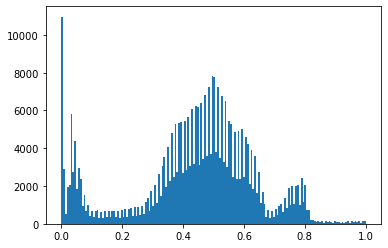

In [8]:
plt.hist(sample_img.ravel(), bins='auto')

0.310546875


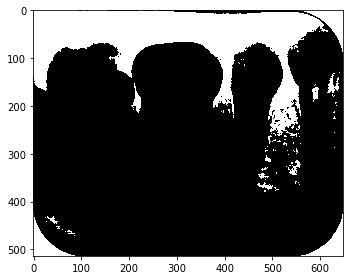

In [9]:
threshold = threshold_otsu(sample_img)
print(threshold)
threshold_img = sample_img<threshold
io.imshow(threshold_img)

[0.25195312 0.54101562]


D:\Faizan\Anaconda3\envs\tensorflow\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


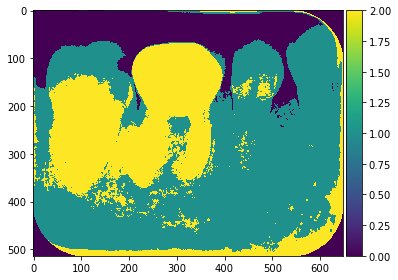

In [10]:
thresholds = threshold_multiotsu(sample_img, classes=3)
print(thresholds)
multi_threshold_img = np.digitize(sample_img, bins=thresholds)
io.imshow(multi_threshold_img)

In [11]:
# edge_touching_removed = clear_border(multi_threshold_img)
# io.imshow(edge_touching_removed)

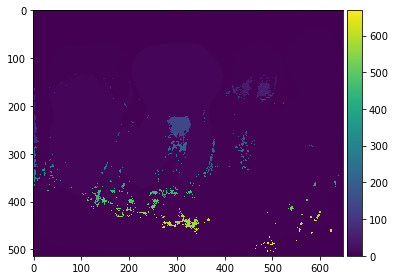

In [12]:
label_image = measure.label(multi_threshold_img, connectivity=sample_img.ndim)
io.imshow(label_image)

<ipython-input-13-dfcd7f176269>:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  image_label_overlay = label2rgb(label_image, image=sample_img)


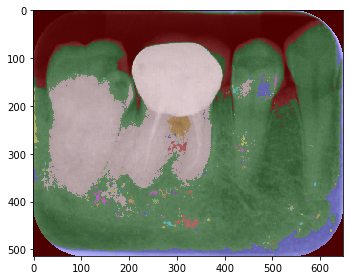

In [13]:
image_label_overlay = label2rgb(label_image, image=sample_img)
io.imshow(image_label_overlay)

In [14]:
properties = ['label', 'area', 'bbox', 'bbox_area', 'centroid', 'filled_image', 'image', 'slice']
props = measure.regionprops_table(label_image, sample_img, properties=properties)

In [15]:
props

{'label': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176,

In [16]:
import pandas as pd
df = pd.DataFrame(props)
df

,label,area,bbox-0,bbox-1,bbox-2,bbox-3,bbox_area,centroid-0,centroid-1,filled_image,image,slice
0,1,16278,0,30,514,648,317652,406.896117,469.935619,"[[False, False, False, False, False, False, Fa...","[[False, False, False, False, False, False, Fa...","(slice(0, 514, None), slice(30, 648, None))"
1,2,14,1,94,2,108,14,1.000000,100.500000,"[[True, True, True, True, True, True, True, Tr...","[[True, True, True, True, True, True, True, Tr...","(slice(1, 2, None), slice(94, 108, None))"
2,3,6,1,109,2,115,6,1.000000,111.500000,"[[True, True, True, True, True, True]]","[[True, True, True, True, True, True]]","(slice(1, 2, None), slice(109, 115, None))"
3,4,172806,1,0,506,645,325725,305.350283,368.141164,"[[False, False, False, False, False, False, Fa...","[[False, False, False, False, False, False, Fa...","(slice(1, 506, None), slice(0, 645, None))"
4,5,2,32,583,34,584,2,32.500000,583.000000,"[[True], [True]]","[[True], [True]]","(slice(32, 34, None), slice(583, 584, None))"
...,...,...,...,...,...,...,...,...,...,...,...,...
664,665,6,501,489,506,491,10,503.166667,489.666667,"[[False, True], [False, True], [False, True], ...","[[False, True], [False, True], [False, True], ...","(slice(501, 506, None), slice(489, 491, None))"
665,666,1,502,496,503,497,1,502.000000,496.000000,[[True]],[[True]],"(slice(502, 503, None), slice(496, 497, None))"
666,667,1,503,421,504,422,1,503.000000,421.000000,[[True]],[[True]],"(slice(503, 504, None), slice(421, 422, None))"
667,668,1,504,493,505,494,1,504.000000,493.000000,[[True]],[[True]],"(slice(504, 505, None), slice(493, 494, None))"


In [17]:
df = df[df['area']>100]
df.head()

,label,area,bbox-0,bbox-1,bbox-2,bbox-3,bbox_area,centroid-0,centroid-1,filled_image,image,slice
0,1,16278,0,30,514,648,317652,406.896117,469.935619,"[[False, False, False, False, False, False, Fa...","[[False, False, False, False, False, False, Fa...","(slice(0, 514, None), slice(30, 648, None))"
3,4,172806,1,0,506,645,325725,305.350283,368.141164,"[[False, False, False, False, False, False, Fa...","[[False, False, False, False, False, False, Fa...","(slice(1, 506, None), slice(0, 645, None))"
7,8,77383,68,16,411,397,130683,233.448341,211.934340,"[[False, False, False, False, False, False, Fa...","[[False, False, False, False, False, False, Fa...","(slice(68, 411, None), slice(16, 397, None))"
47,48,472,145,431,182,465,1258,161.745763,444.730932,"[[False, False, False, False, False, False, Fa...","[[False, False, False, False, False, False, Fa...","(slice(145, 182, None), slice(431, 465, None))"
50,51,692,146,466,184,501,1330,166.323699,482.625723,"[[False, False, False, False, False, False, Fa...","[[False, False, False, False, False, False, Fa...","(slice(146, 184, None), slice(466, 501, None))"


In [18]:
df

,label,area,bbox-0,bbox-1,bbox-2,bbox-3,bbox_area,centroid-0,centroid-1,filled_image,image,slice
0,1,16278,0,30,514,648,317652,406.896117,469.935619,"[[False, False, False, False, False, False, Fa...","[[False, False, False, False, False, False, Fa...","(slice(0, 514, None), slice(30, 648, None))"
3,4,172806,1,0,506,645,325725,305.350283,368.141164,"[[False, False, False, False, False, False, Fa...","[[False, False, False, False, False, False, Fa...","(slice(1, 506, None), slice(0, 645, None))"
7,8,77383,68,16,411,397,130683,233.448341,211.934340,"[[False, False, False, False, False, False, Fa...","[[False, False, False, False, False, False, Fa...","(slice(68, 411, None), slice(16, 397, None))"
47,48,472,145,431,182,465,1258,161.745763,444.730932,"[[False, False, False, False, False, False, Fa...","[[False, False, False, False, False, False, Fa...","(slice(145, 182, None), slice(431, 465, None))"
50,51,692,146,466,184,501,1330,166.323699,482.625723,"[[False, False, False, False, False, False, Fa...","[[False, False, False, False, False, False, Fa...","(slice(146, 184, None), slice(466, 501, None))"
81,82,571,160,0,280,10,1200,230.518389,2.427320,"[[True, False, False, False, False, False, Fal...","[[True, False, False, False, False, False, Fal...","(slice(160, 280, None), slice(0, 10, None))"
145,146,1593,222,280,274,331,2652,241.809793,305.844947,"[[False, False, False, False, True, True, True...","[[False, False, False, False, True, True, True...","(slice(222, 274, None), slice(280, 331, None))"
191,192,132,262,434,285,448,322,274.409091,440.000000,"[[False, False, False, False, False, False, Tr...","[[False, False, False, False, False, False, Tr...","(slice(262, 285, None), slice(434, 448, None))"
203,204,316,268,360,339,381,1491,307.465190,372.908228,"[[False, False, False, False, False, False, Fa...","[[False, False, False, False, False, False, Fa...","(slice(268, 339, None), slice(360, 381, None))"
209,210,431,273,282,306,322,1320,285.832947,304.027842,"[[False, False, False, False, False, False, Fa...","[[False, False, False, False, False, False, Fa...","(slice(273, 306, None), slice(282, 322, None))"


In [19]:
len(df.label)

16

### There are 7 most important lables and regions

In [20]:
img = df['filled_image']
img

0      [[False, False, False, False, False, False, Fa...
3      [[False, False, False, False, False, False, Fa...
7      [[False, False, False, False, False, False, Fa...
47     [[False, False, False, False, False, False, Fa...
50     [[False, False, False, False, False, False, Fa...
81     [[True, False, False, False, False, False, Fal...
145    [[False, False, False, False, True, True, True...
191    [[False, False, False, False, False, False, Tr...
203    [[False, False, False, False, False, False, Fa...
209    [[False, False, False, False, False, False, Fa...
223    [[True, True, True, False, False, False, False...
310    [[True, True, True, True, False, False, False,...
442    [[False, False, False, False, False, False, Fa...
482    [[False, False, False, False, True, False, Fal...
579    [[False, False, False, False, False, False, Fa...
596    [[False, False, False, False, False, False, Fa...
Name: filled_image, dtype: object

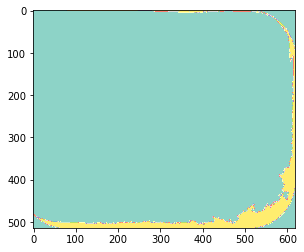

In [21]:
plt.imshow(img[0], cmap='Set3')

In [22]:
props = measure.regionprops(label_image)

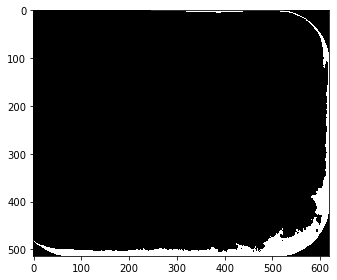

In [23]:
img = props[0].image
io.imshow(img)

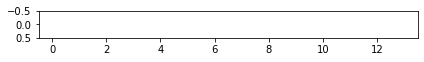

In [24]:
img = props[1].image
io.imshow(img)